In [6]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import os
from textwrap import wrap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import eli5
import cleanfunc
import re
from sklearn.metrics import r2_score

importlib.reload(cleanfunc)


<module 'cleanfunc' from 'C:\\Users\\chris\\ABS-Region-Data\\cleanfunc.py'>

In [20]:
df = cleanfunc.load_merge_clean()

C:\Users\chris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2901: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\chris\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\chris\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [21]:
df.head()


,NUMBER OF BUSINESSES Number of non-employing businesses no.,NUMBER OF BUSINESSES 1-4 employees no.,NUMBER OF BUSINESSES 5-19 employees no.,NUMBER OF BUSINESSES 20 or more employees no.,NUMBER OF BUSINESSES Total number of businesses no.,BUSINESS ENTRIES Number of non-employing business entries no.,BUSINESS ENTRIES 1-4 employees no.,BUSINESS ENTRIES 5-19 employees no.,BUSINESS ENTRIES 20 or more employees no.,BUSINESS ENTRIES Total number of business entries no.,...,RELIGIOUS AFFILIATION Judaism %,RELIGIOUS AFFILIATION Other Religions %,"RELIGIOUS AFFILIATION Secular Beliefs, Other Spiritual Beliefs and No Religious Affiliation %",RELIGIOUS AFFILIATION Inadequately described or not stated %,AUSTRALIAN CITIZENSHIP Australian citizen %,AUSTRALIAN CITIZENSHIP Not an Australian citizen %,AUSTRALIAN CITIZENSHIP Australian Citizenship - Not stated %,SPEAKS A LANGUAGE OTHER THAN ENGLISH AT HOME Proportion of total population %,lat,long
LABEL,,,,,,,,,,,,,,,,,,,,,
Braidwood,404.0,149.0,33.0,3.0,589.0,42.0,15.0,6.550351,3.855263,52.0,...,0.748598,0.5,35.3,14.6,85.0,3.2,11.7,3.4,-35.444450,149.799675
Karabar,209.0,106.0,17.0,3.0,335.0,25.0,19.0,6.550351,3.855263,38.0,...,0.748598,0.8,24.5,8.1,89.7,4.0,6.2,13.5,-35.375943,149.232872
Queanbeyan,402.0,193.0,89.0,27.0,712.0,75.0,32.0,5.000000,3.855263,111.0,...,0.100000,2.1,28.5,10.5,80.6,11.2,8.2,21.2,-35.352466,149.233725
Queanbeyan - East,292.0,144.0,90.0,24.0,554.0,39.0,23.0,4.000000,3.855263,67.0,...,0.200000,2.6,27.4,9.2,82.0,11.4,6.4,20.4,-35.345549,149.246507
Queanbeyan Region,915.0,487.0,119.0,9.0,1526.0,149.0,50.0,3.000000,3.855263,202.0,...,0.748598,0.6,32.5,12.2,87.8,2.6,9.7,5.8,-35.352466,149.233725


In [23]:
df.shape

(557, 456)

In [24]:

cycle_col = 'METHOD OF TRAVEL TO WORK - EMPLOYED PERSONS Used one method - Bicycle no.'
y=df[cycle_col]
y = y/df['HOUSEHOLDS BY TYPE Total households no.']

In [25]:
y[y>1]

LABEL
Badgerys Creek    2.202652
dtype: float64

In [26]:
df = df[y<0.02]
#df = df[y>0.02]
y=df[cycle_col]
y = y/df['HOUSEHOLDS BY TYPE Total households no.']
X = df.drop([cycle_col], axis = 1)

array([2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3,
       2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 3, 2, 1, 3, 1, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3,
       2, 2, 2, 1, 2, 3, 2, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3,
       1, 2, 2, 2, 2, 1, 1, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3,
       2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3,
       3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 1,
       3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 3, 3,

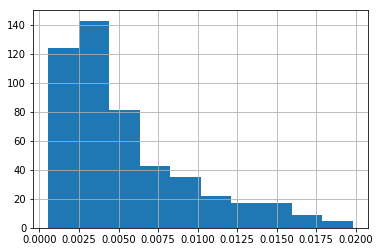

In [35]:
bins     = np.geomspace(min(y), max(y), 4)
y_binned = np.digitize(y, bins)
y.hist()
df.shape
y_binned

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [39]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

Text(0,0.5,'Actuals')

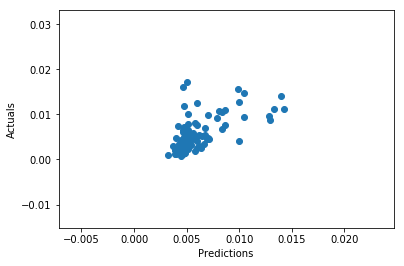

In [40]:
y_pred = ada.predict(X_test)
plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actuals')

In [41]:
perm = eli5.sklearn.PermutationImportance(ada).fit(X_test, y_test)

In [42]:
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0403 ± 0.0675,COMMUTING TO WORK Average commuting distance from Place of Usual Residence kms
0.0321 ± 0.0137,COMMUTING TO WORK Median commuting distance from Place of Usual Residence kms
0.0176 ± 0.0112,SOLAR INSTALLATIONS Increase in SWH installations from previous year %
0.0131 ± 0.0054,TENURE TYPE Rented %
0.0101 ± 0.0363,long
0.0097 ± 0.0103,EMPLOYED BY INDUSTRY Retail Trade %
0.0095 ± 0.0075,OVERSEAS BORN POPULATION (PROPORTION OF TOTAL POPULATION) Born in North-West Europe %
0.0079 ± 0.0314,HOUSEHOLDS BY TYPE Group households no.
0.0075 ± 0.0048,HOUSING SUITABILITY Dwellings with extra bedrooms needed no.
0.0062 ± 0.0099,METHOD OF TRAVEL TO WORK - EMPLOYED PERSONS Used one method - Motor bike/scooter no.


In [44]:
r2_score(y_test, y_pred)


0.3667987022569045

In [49]:
paramgrid = {'n_estimators': [50, 100, 1000],
             'learning_rate':[0.01,0.1,1]
            }

gb = GridSearchCV(AdaBoostRegressor(), param_grid = paramgrid, verbose = 2)

In [46]:
#ada.get_params().keys()
gb.fit(X_train, y_train)

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.1, 1], 'n_estimators': [50, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Text(0,0.5,'Actuals')

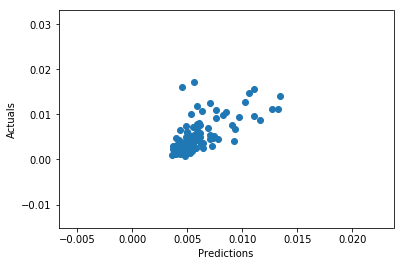

In [47]:
y_pred = gb.predict(X_test)
plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actuals')

In [48]:
r2_score(y_test, y_pred)


0.4076373143559462

In [89]:
gb.best_params_

{'learning_rate': 1, 'n_estimators': 100}